In [1]:
import pandas as pd
data = pd.read_csv('daily.csv')
print(data.shape)
data.head()

(10244, 8)


,year,month,day,CO2_value,CH4_value,N2O_value,CO_value,SF6_value
0,1995,12,15,360.59,1764.21,313.380000,95.535000,3.340000
1,1995,12,16,361.76,1783.36,313.361786,96.842679,3.343571
2,1995,12,17,360.72,1762.18,313.343571,98.150357,3.347143
3,1995,12,18,360.46,1760.24,313.325357,99.458036,3.350714
4,1995,12,19,360.44,1760.78,313.307143,100.765714,3.354286


Best parameters found:  OrderedDict([('max_depth', 31), ('max_features', 2), ('min_samples_leaf', 1), ('min_samples_split', 2), ('n_estimators', 1000)])
Best cross-validation R2 score:  -3.2529247058808344
Mean cross-validated MSE on training set:  3.2529247058808344
Mean cross-validated R2 on training set:  0.9895746860912341
Mean Squared Error on test set:  3.162236760589946
R² on test set:  0.9896866219864219


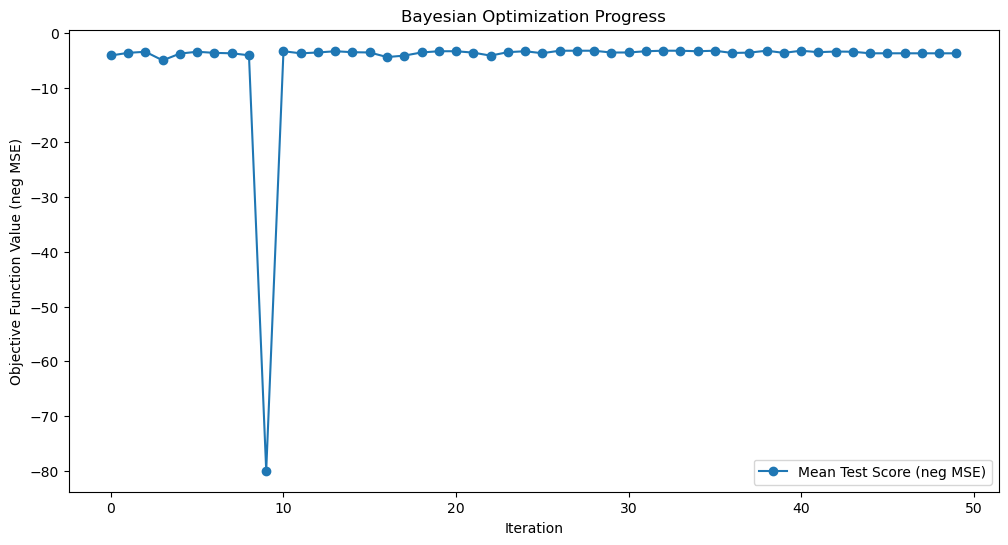

In [4]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from skopt import BayesSearchCV
from skopt.space import Real, Integer
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

# 分离特征值和目标值
X = data[['CH4_value', 'N2O_value', 'CO_value']]
y = data['CO2_value']

# 分割训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 定义随机森林模型
rf = RandomForestRegressor(random_state=42)

# 定义超参数搜索空间
param_space = {
    'n_estimators': Integer(10, 1000),
    'max_depth': Integer(1, 50),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 20),
    'max_features': Integer(1, X.shape[1])
}

# 定义贝叶斯搜索
opt = BayesSearchCV(
    estimator=rf,
    search_spaces=param_space,
    n_iter=50,  # 迭代次数，可以根据需要调整
    cv=5,  # 在训练集上进行5折交叉验证
    n_jobs=-1,
    random_state=42,
    scoring='neg_mean_squared_error'  # 使用负均方误差作为优化目标
)

# 在训练集上执行优化
opt.fit(X_train, y_train)

# 输出最佳参数
print("Best parameters found: ", opt.best_params_)
print("Best cross-validation R2 score: ", opt.best_score_)

# 使用最佳模型在训练集上进行交叉验证评分
cv_results_mse = cross_val_score(opt.best_estimator_, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_mse = -cv_results_mse.mean()
print("Mean cross-validated MSE on training set: ", mean_cv_mse)

cv_results_r2 = cross_val_score(opt.best_estimator_, X_train, y_train, cv=5, scoring='r2')
mean_cv_r2 = cv_results_r2.mean()
print("Mean cross-validated R2 on training set: ", mean_cv_r2)

# 使用最佳模型在测试集上进行预测
y_pred = opt.best_estimator_.predict(X_test)

# 计算测试集上的均方误差 (MSE)
mse_test = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on test set: ", mse_test)

# 计算测试集上的决定系数 (R²)
r2_test = r2_score(y_test, y_pred)
print("R² on test set: ", r2_test)

# 获取优化过程的结果
results = opt.cv_results_

# 可视化优化过程
plt.figure(figsize=(12, 6))

# 绘制优化过程中目标函数的值
plt.plot(results['mean_test_score'], marker='o', label='Mean Test Score (neg MSE)')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value (neg MSE)')
plt.title('Bayesian Optimization Progress')
plt.legend()
plt.show()


Best parameters found:  OrderedDict([('max_depth', 40), ('max_features', 3), ('min_samples_leaf', 16), ('min_samples_split', 20)])
Best cross-validation R2 score:  -4.422432883883495
Mean cross-validated MSE on training set:  4.422432883883495
Mean cross-validated R2 on training set:  0.9858337201694546
Mean Squared Error on test set:  4.177637024342624
R² on test set:  0.9863749766075305


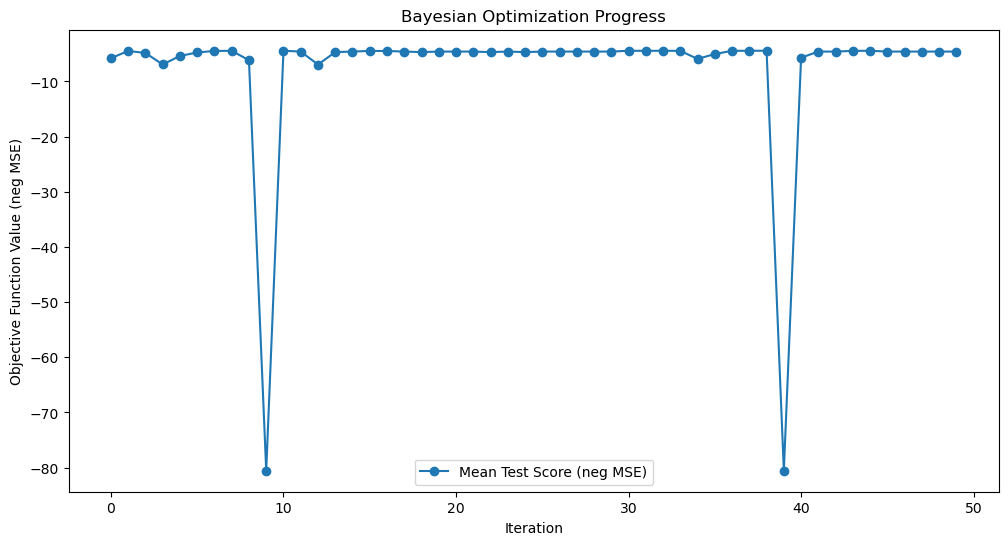

In [5]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from skopt import BayesSearchCV
from skopt.space import Real, Integer
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score


# 分割训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 定义决策树回归模型
dt = DecisionTreeRegressor(random_state=42)

# 定义超参数搜索空间
param_space = {
    'max_depth': Integer(1, 50),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 20),
    'max_features': Integer(1, X.shape[1])
}

# 定义贝叶斯搜索
opt = BayesSearchCV(
    estimator=dt,
    search_spaces=param_space,
    n_iter=50,  # 迭代次数，可以根据需要调整
    cv=5,  # 在训练集上进行5折交叉验证
    n_jobs=-1,
    random_state=42,
    scoring='neg_mean_squared_error'  # 使用负均方误差作为优化目标
)

# 在训练集上执行优化
opt.fit(X_train, y_train)

# 输出最佳参数
print("Best parameters found: ", opt.best_params_)
print("Best cross-validation R2 score: ", opt.best_score_)

# 使用最佳模型在训练集上进行交叉验证评分
cv_results_mse = cross_val_score(opt.best_estimator_, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_mse = -cv_results_mse.mean()
print("Mean cross-validated MSE on training set: ", mean_cv_mse)

cv_results_r2 = cross_val_score(opt.best_estimator_, X_train, y_train, cv=5, scoring='r2')
mean_cv_r2 = cv_results_r2.mean()
print("Mean cross-validated R2 on training set: ", mean_cv_r2)

# 使用最佳模型在测试集上进行预测
y_pred = opt.best_estimator_.predict(X_test)

# 计算测试集上的均方误差 (MSE)
mse_test = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on test set: ", mse_test)

# 计算测试集上的决定系数 (R²)
r2_test = r2_score(y_test, y_pred)
print("R² on test set: ", r2_test)

# 获取优化过程的结果
results = opt.cv_results_

# 可视化优化过程
plt.figure(figsize=(12, 6))

# 绘制优化过程中目标函数的值
plt.plot(results['mean_test_score'], marker='o', label='Mean Test Score (neg MSE)')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value (neg MSE)')
plt.title('Bayesian Optimization Progress')
plt.legend()
plt.show()


Best parameters found: 
  colsample_bytree: 1.0
  learning_rate: 0.010232536495285589
  max_depth: 17
  min_child_weight: 1
  n_estimators: 1000
  subsample: 0.4277292527579605
Best cross-validation R2 score:  -3.4314623070083305
Mean cross-validated MSE on training set:  3.4314623070083305
Mean cross-validated R2 on training set:  0.9890058425604042
Mean Squared Error on test set:  3.4609449557007905
R² on test set:  0.9887124095016625


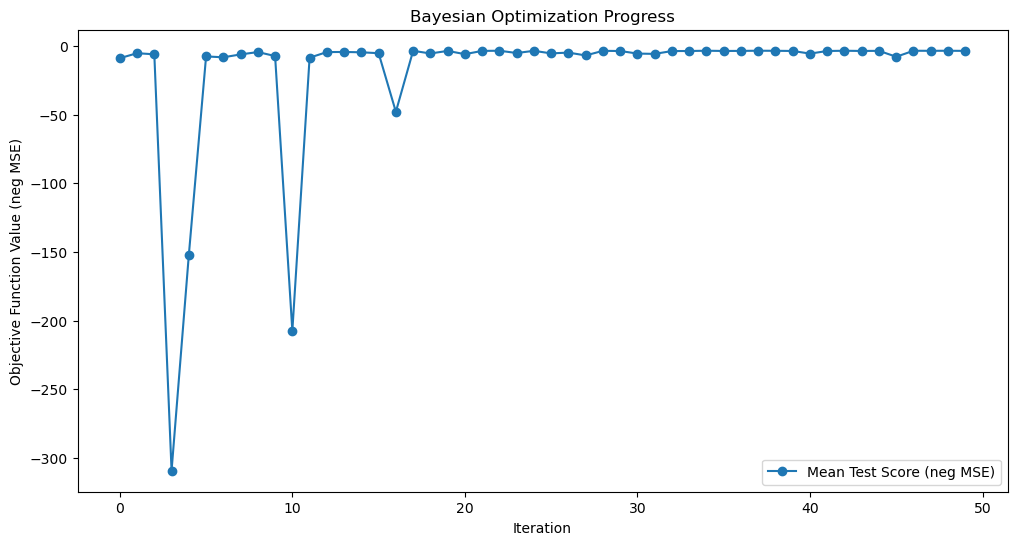

In [8]:
import pandas as pd
import xgboost as xgb
from skopt import BayesSearchCV
from skopt.space import Real, Integer
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score

# 分割训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 定义XGBoost回归模型
xgbr = xgb.XGBRegressor(random_state=42, objective='reg:squarederror')

# 定义超参数搜索空间
param_space = {
    'n_estimators': Integer(50, 1000),
    'max_depth': Integer(1, 50),
    'learning_rate': Real(1e-6, 1.0, 'log-uniform'),
    'subsample': Real(0.1, 1.0),
    'colsample_bytree': Real(0.1, 1.0),
    'min_child_weight': Integer(1, 10)
}

# 定义贝叶斯搜索
opt = BayesSearchCV(
    estimator=xgbr,
    search_spaces=param_space,
    n_iter=50,  # 迭代次数，可以根据需要调整
    cv=5,  # 在训练集上进行5折交叉验证
    n_jobs=-1,
    random_state=42,
    scoring='neg_mean_squared_error'  # 使用负均方误差作为优化目标
)

# 在训练集上执行优化
opt.fit(X_train, y_train)

# 输出最佳参数
print("Best parameters found: ")
for param, value in opt.best_params_.items():
    print(f"  {param}: {value}")
print("Best cross-validation R2 score: ", opt.best_score_)

# 使用最佳模型在训练集上进行交叉验证评分
cv_results_mse = cross_val_score(opt.best_estimator_, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_mse = -cv_results_mse.mean()
print("Mean cross-validated MSE on training set: ", mean_cv_mse)

cv_results_r2 = cross_val_score(opt.best_estimator_, X_train, y_train, cv=5, scoring='r2')
mean_cv_r2 = cv_results_r2.mean()
print("Mean cross-validated R2 on training set: ", mean_cv_r2)

# 使用最佳模型在测试集上进行预测
y_pred = opt.best_estimator_.predict(X_test)

# 计算测试集上的均方误差 (MSE)
mse_test = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on test set: ", mse_test)

# 计算测试集上的决定系数 (R²)
r2_test = r2_score(y_test, y_pred)
print("R² on test set: ", r2_test)

# 获取优化过程的结果
results = opt.cv_results_

# 可视化优化过程
plt.figure(figsize=(12, 6))

# 绘制优化过程中目标函数的值
plt.plot(results['mean_test_score'], marker='o', label='Mean Test Score (neg MSE)')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value (neg MSE)')
plt.title('Bayesian Optimization Progress')
plt.legend()
plt.show()


Best parameters found: 
  max_depth: 40
  max_features: 3
  min_samples_leaf: 16
  min_samples_split: 20
Best cross-validation R2 score:  -4.422432883883495
Mean cross-validated MSE on training set:  4.422432883883495
Mean cross-validated R2 on training set:  0.9858337201694546
Mean Squared Error on test set:  4.177637024342624
R² on test set:  0.9863749766075305


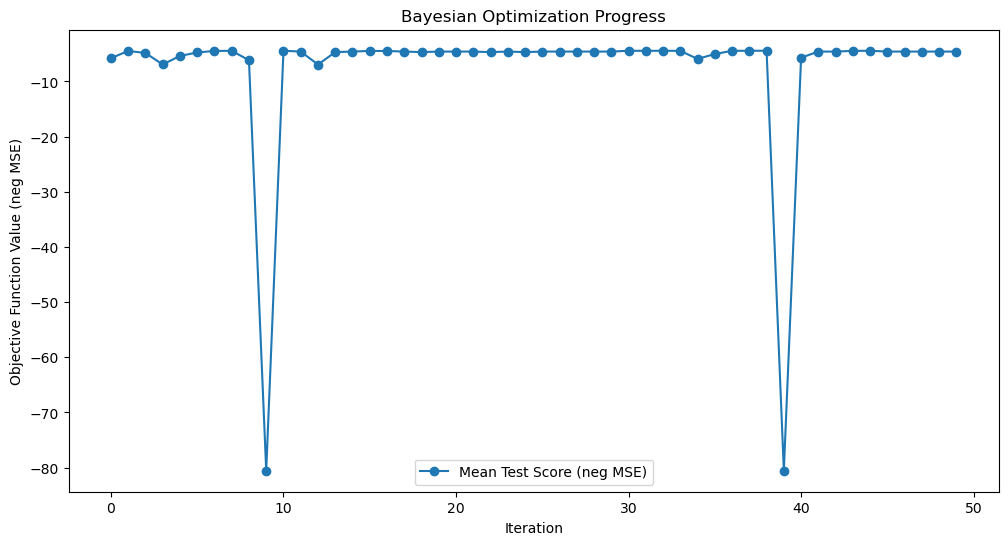

In [9]:

# 分割训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 定义决策树回归模型
dt = DecisionTreeRegressor(random_state=42)

# 定义超参数搜索空间
param_space = {
    'max_depth': Integer(1, 50),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 20),
    'max_features': Integer(1, X.shape[1])
}

# 定义贝叶斯搜索
opt = BayesSearchCV(
    estimator=dt,
    search_spaces=param_space,
    n_iter=50,  # 迭代次数，可以根据需要调整
    cv=5,  # 在训练集上进行5折交叉验证
    n_jobs=-1,
    random_state=42,
    scoring='neg_mean_squared_error'  # 使用负均方误差作为优化目标
)

# 在训练集上执行优化
opt.fit(X_train, y_train)

# 输出最佳参数
print("Best parameters found: ")
for param, value in opt.best_params_.items():
    print(f"  {param}: {value}")
print("Best cross-validation R2 score: ", opt.best_score_)

# 使用最佳模型在训练集上进行交叉验证评分
cv_results_mse = cross_val_score(opt.best_estimator_, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_mse = -cv_results_mse.mean()
print("Mean cross-validated MSE on training set: ", mean_cv_mse)

cv_results_r2 = cross_val_score(opt.best_estimator_, X_train, y_train, cv=5, scoring='r2')
mean_cv_r2 = cv_results_r2.mean()
print("Mean cross-validated R2 on training set: ", mean_cv_r2)

# 使用最佳模型在测试集上进行预测
y_pred = opt.best_estimator_.predict(X_test)

# 计算测试集上的均方误差 (MSE)
mse_test = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on test set: ", mse_test)

# 计算测试集上的决定系数 (R²)
r2_test = r2_score(y_test, y_pred)
print("R² on test set: ", r2_test)

# 获取优化过程的结果
results = opt.cv_results_

# 可视化优化过程
plt.figure(figsize=(12, 6))

# 绘制优化过程中目标函数的值
plt.plot(results['mean_test_score'], marker='o', label='Mean Test Score (neg MSE)')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value (neg MSE)')
plt.title('Bayesian Optimization Progress')
plt.legend()
plt.show()

Best parameters found: 
  max_depth: 31
  max_features: 2
  min_samples_leaf: 1
  min_samples_split: 2
  n_estimators: 1000
Best cross-validation R2 score:  -3.2529247058808344
Mean cross-validated MSE on training set:  3.2529247058808344
Mean cross-validated R2 on training set:  0.9895746860912341
Mean Squared Error on test set:  3.162236760589946
R² on test set:  0.9896866219864219


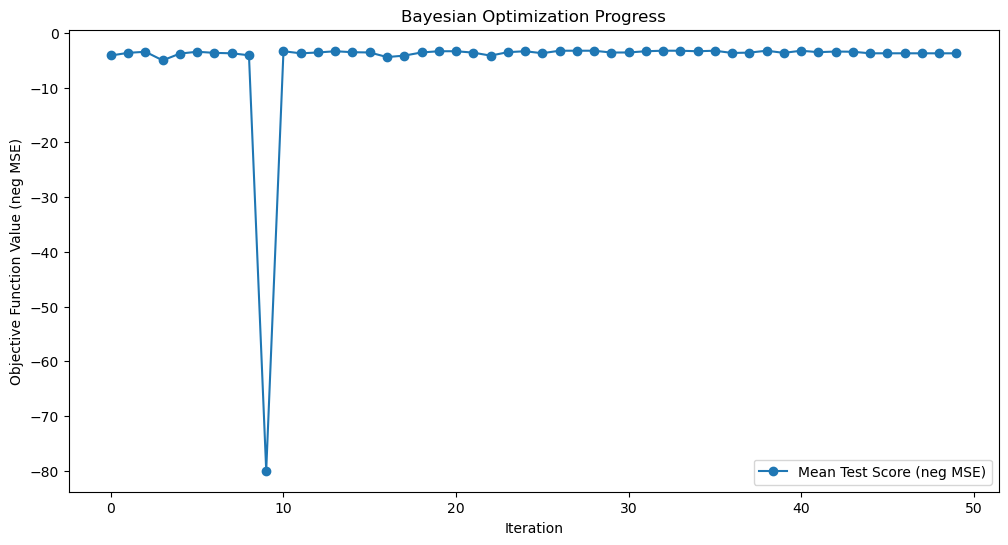

In [10]:
# 分割训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 定义随机森林模型
rf = RandomForestRegressor(random_state=42)

# 定义超参数搜索空间
param_space = {
    'n_estimators': Integer(10, 1000),
    'max_depth': Integer(1, 50),
    'min_samples_split': Integer(2, 20),
    'min_samples_leaf': Integer(1, 20),
    'max_features': Integer(1, X.shape[1])
}

# 定义贝叶斯搜索
opt = BayesSearchCV(
    estimator=rf,
    search_spaces=param_space,
    n_iter=50,  # 迭代次数，可以根据需要调整
    cv=5,  # 在训练集上进行5折交叉验证
    n_jobs=-1,
    random_state=42,
    scoring='neg_mean_squared_error'  # 使用负均方误差作为优化目标
)

# 在训练集上执行优化
opt.fit(X_train, y_train)

# 输出最佳参数
print("Best parameters found: ")
for param, value in opt.best_params_.items():
    print(f"  {param}: {value}")
print("Best cross-validation R2 score: ", opt.best_score_)

# 使用最佳模型在训练集上进行交叉验证评分
cv_results_mse = cross_val_score(opt.best_estimator_, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_cv_mse = -cv_results_mse.mean()
print("Mean cross-validated MSE on training set: ", mean_cv_mse)

cv_results_r2 = cross_val_score(opt.best_estimator_, X_train, y_train, cv=5, scoring='r2')
mean_cv_r2 = cv_results_r2.mean()
print("Mean cross-validated R2 on training set: ", mean_cv_r2)

# 使用最佳模型在测试集上进行预测
y_pred = opt.best_estimator_.predict(X_test)

# 计算测试集上的均方误差 (MSE)
mse_test = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on test set: ", mse_test)

# 计算测试集上的决定系数 (R²)
r2_test = r2_score(y_test, y_pred)
print("R² on test set: ", r2_test)

# 获取优化过程的结果
results = opt.cv_results_

# 可视化优化过程
plt.figure(figsize=(12, 6))

# 绘制优化过程中目标函数的值
plt.plot(results['mean_test_score'], marker='o', label='Mean Test Score (neg MSE)')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value (neg MSE)')
plt.title('Bayesian Optimization Progress')
plt.legend()
plt.show()

|   iter    |  target   | batch_... |  epochs   | learni... | lstm_u... |
-------------------------------------------------------------------------


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
| 1         | -1.699    | 57.95     | 95.56     | 0.0732    | 63.88     |


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
| 2         | -0.6747   | 33.47     | 24.04     | 0.005818  | 87.96     |


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
| 3         | -0.9552   | 83.32     | 73.73     | 0.002068  | 97.29     |


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
| 4         | -2.644    | 109.2     | 29.11     | 0.01819   | 26.51     |


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
| 5         | -2.149    | 50.08     | 57.23     | 0.0432    | 36.21     |


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
| 6         | -0.6954   | 32.1      | 24.63     | 0.01629   | 90.18     |


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
| 7         | -542.2    | 74.95     | 10.0      | 1e-05     | 100.0     |


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
| 8         | -10.18    | 17.41     | 57.28     | 1e-05     | 70.07     |


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
| 9         | -172.2    | 101.9     | 79.68     | 1e-05     | 44.65     |


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
| 10        | -5.608    | 41.69     | 82.93     | 1e-05     | 100.0     |


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
| 11        | -3.032    | 16.0      | 17.37     | 0.1       | 47.89     |


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
| 12        | -4.828    | 61.75     | 15.53     | 0.08966   | 10.0      |


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
| 13        | -328.7    | 17.37     | 98.48     | 0.1       | 30.7      |


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
| 14        | -227.7    | 22.56     | 29.3      | 1e-05     | 10.0      |


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
| 15        | -0.9352   | 52.99     | 61.35     | 0.1       | 72.39     |


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
| 16        | -307.1    | 81.14     | 46.17     | 0.1       | 10.0      |


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
| 17        | -42.36    | 37.9      | 38.58     | 0.07969   | 55.72     |


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
| 18        | -0.4948   | 68.24     | 100.0     | 0.1       | 93.39     |


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
| 19        | -1.2e+03  | 128.0     | 10.0      | 1e-05     | 15.0      |


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
| 20        | -72.15    | 62.64     | 79.54     | 1e-05     | 83.94     |


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
| 21        | -1.808    | 34.43     | 53.85     | 0.1       | 92.45     |


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
| 22        | -272.9    | 98.4      | 36.09     | 1e-05     | 46.26     |


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
| 23        | -317.1    | 16.0      | 30.64     | 0.1       | 72.45     |


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
| 24        | -0.5255   | 33.66     | 73.92     | 0.03975   | 77.05     |


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
| 25        | -104.4    | 36.56     | 65.55     | 1e-05     | 54.25     |
Best parameters found: 
  batch_size: 68.24213650454593
  epochs: 100.0
  learning_rate: 0.1
  lstm_units: 93.38995324897226


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Mean Squared Error on test set:  0.5134486613854855
R² on test set:  0.9983254289490815


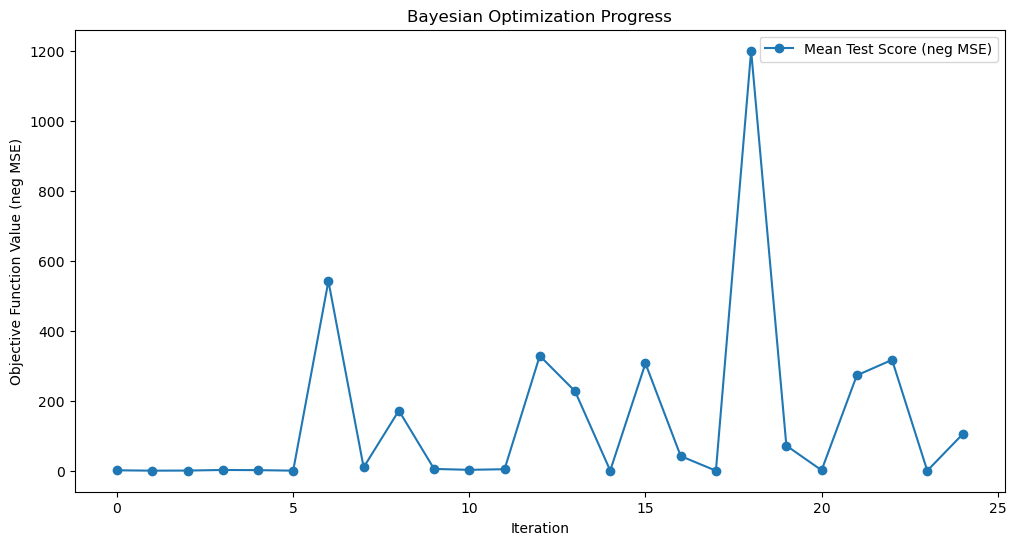

In [17]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from bayes_opt import BayesianOptimization
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# 假设数据中有日期特征，命名为 'Year', 'Month', 'Day'
# 分离特征值和目标值
X = data[['year', 'month', 'day', 'CH4_value', 'N2O_value', 'CO_value']].values
y = data['CO2_value'].values

# 标准化数据
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# 分割训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# 将数据重新调整为3D形状，以适应LSTM输入要求
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# 定义LSTM模型
def create_model(lstm_units, learning_rate):
    model = Sequential()
    model.add(LSTM(units=int(lstm_units), activation='relu', input_shape=(X_train.shape[1], 1)))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
    return model

# 定义目标函数
def train_model(lstm_units, learning_rate, batch_size, epochs):
    model = create_model(lstm_units, learning_rate)
    model.fit(X_train, y_train, epochs=int(epochs), batch_size=int(batch_size), verbose=0)
    y_pred_scaled = model.predict(X_test)
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
    y_test_unscaled = scaler_y.inverse_transform(y_test.reshape(-1, 1))
    mse = mean_squared_error(y_test_unscaled, y_pred)
    return -mse  # 目标是最小化均方误差，所以返回负值

# 定义贝叶斯优化参数空间
pbounds = {
    'lstm_units': (10, 100),
    'learning_rate': (1e-5, 1e-1),
    'batch_size': (16, 128),
    'epochs': (10, 100)
}

# 初始化贝叶斯优化器
optimizer = BayesianOptimization(
    f=train_model,
    pbounds=pbounds,
    random_state=42
)

# 执行贝叶斯优化
optimizer.maximize(init_points=5, n_iter=20)

# 输出最佳参数
print("Best parameters found: ")
for param, value in optimizer.max['params'].items():
    print(f"  {param}: {value}")

# 使用最佳模型在训练集上进行评估
best_params = optimizer.max['params']
model = create_model(best_params['lstm_units'], best_params['learning_rate'])
model.fit(X_train, y_train, epochs=int(best_params['epochs']), batch_size=int(best_params['batch_size']), verbose=0)

# 使用最佳模型在测试集上进行预测
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_test_unscaled = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# 计算测试集上的均方误差 (MSE)
mse_test = mean_squared_error(y_test_unscaled, y_pred)
print("Mean Squared Error on test set: ", mse_test)

# 计算测试集上的决定系数 (R²)
r2_test = r2_score(y_test_unscaled, y_pred)
print("R² on test set: ", r2_test)

# 可视化优化过程
results = optimizer.res
plt.figure(figsize=(12, 6))
plt.plot([-r['target'] for r in results], marker='o', label='Mean Test Score (neg MSE)')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value (neg MSE)')
plt.title('Bayesian Optimization Progress')
plt.legend()
plt.show()


|   iter    |  target   | batch_... |  epochs   | learni... | lstm_u... |
-------------------------------------------------------------------------


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
| 1         | -0.9729   | 57.95     | 95.56     | 0.0732    | 63.88     |


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
| 2         | -0.5873   | 33.47     | 24.04     | 0.005818  | 87.96     |


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
| 3         | -0.5356   | 83.32     | 73.73     | 0.002068  | 97.29     |


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
| 4         | -0.7638   | 109.2     | 29.11     | 0.01819   | 26.51     |


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
| 5         | -0.4863   | 50.08     | 57.23     | 0.0432    | 36.21     |


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
| 6         | -0.6383   | 50.38     | 55.36     | 0.03771   | 37.67     |


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
| 7         | -0.4117   | 80.62     | 73.06     | 0.02712   | 96.07     |


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
| 8         | -1.227    | 79.47     | 76.53     | 0.04564   | 98.86     |


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
| 9         | -0.5581   | 82.32     | 71.95     | 0.09218   | 96.93     |


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
| 10        | -0.6274   | 78.48     | 71.38     | 0.06931   | 96.39     |


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
| 11        | -0.6187   | 83.57     | 73.29     | 0.006954  | 94.81     |


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
| 12        | -0.5693   | 50.33     | 58.2      | 0.05883   | 33.57     |


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
| 13        | -0.4509   | 79.68     | 72.06     | 0.02968   | 92.1      |


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
| 14        | -0.5873   | 80.63     | 74.07     | 0.07939   | 92.53     |


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
| 15        | -1.866    | 77.67     | 72.17     | 0.09381   | 90.48     |


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
| 16        | -0.52     | 80.65     | 73.31     | 0.004847  | 98.33     |


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
| 17        | -1.396    | 81.61     | 73.6      | 0.07038   | 96.88     |


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
| 18        | -0.9572   | 66.22     | 17.91     | 0.005181  | 85.32     |


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
| 19        | -1.778    | 25.3      | 81.86     | 0.0922    | 97.45     |


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
| 20        | -0.9975   | 56.83     | 35.81     | 0.06923   | 70.06     |


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
| 21        | -1.972    | 126.5     | 64.45     | 0.09006   | 78.14     |


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
| 22        | -0.3824   | 95.96     | 77.28     | 0.004341  | 46.25     |


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
| 23        | -0.5628   | 110.7     | 74.61     | 0.02955   | 58.67     |


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
| 24        | -1.051    | 25.45     | 82.86     | 0.06915   | 64.47     |


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
| 25        | -0.8046   | 104.8     | 97.66     | 0.07285   | 13.48     |
Best parameters found: 
  batch_size: 95.9582065368706
  epochs: 77.27827495157177
  learning_rate: 0.004340744900478485
  lstm_units: 46.24632415246622


D:\Anaconda\Lib\site-packages\keras\src\layers\rnn\bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


65/65 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
Mean Squared Error on test set:  0.9882188298307364
R² on test set:  0.9967770046572102


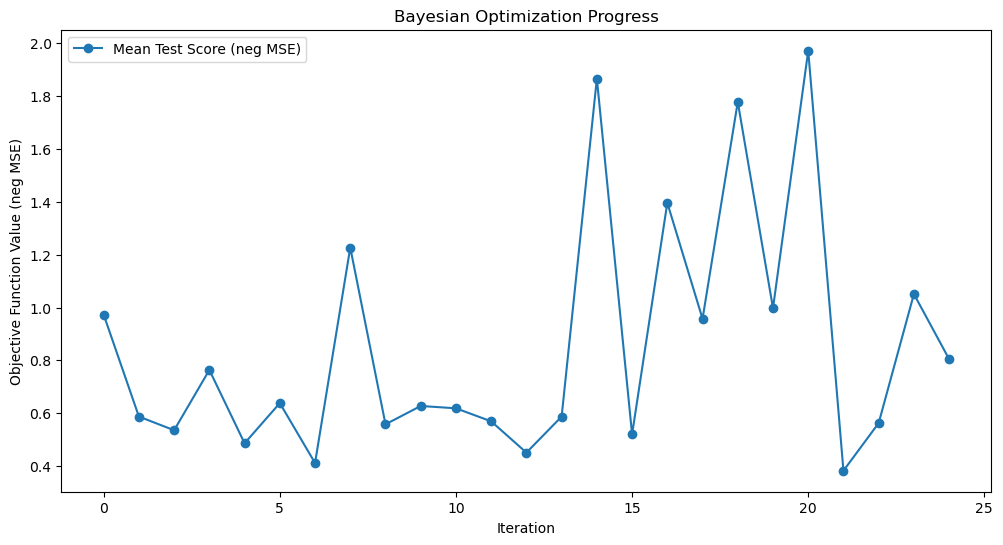

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Bidirectional, Dense
from tensorflow.keras.optimizers import Adam
from bayes_opt import BayesianOptimization
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score

# 假设数据中有日期特征，命名为 'Year', 'Month', 'Day'
# 分离特征值和目标值
X = data[['year', 'month', 'day', 'CH4_value', 'N2O_value', 'CO_value']].values
y = data['CO2_value'].values

# 标准化数据
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1))

# 分割训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

# 将数据重新调整为3D形状，以适应LSTM输入要求
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# 定义BiLSTM模型
def create_model(lstm_units, learning_rate):
    model = Sequential()
    model.add(Bidirectional(LSTM(units=int(lstm_units), activation='relu'), input_shape=(X_train.shape[1], 1)))
    model.add(Dense(1))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
    return model

# 定义目标函数
def train_model(lstm_units, learning_rate, batch_size, epochs):
    model = create_model(lstm_units, learning_rate)
    model.fit(X_train, y_train, epochs=int(epochs), batch_size=int(batch_size), verbose=0)
    y_pred_scaled = model.predict(X_test)
    y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
    y_test_unscaled = scaler_y.inverse_transform(y_test.reshape(-1, 1))
    mse = mean_squared_error(y_test_unscaled, y_pred)
    return -mse  # 目标是最小化均方误差，所以返回负值

# 定义贝叶斯优化参数空间
pbounds = {
    'lstm_units': (10, 100),
    'learning_rate': (1e-5, 1e-1),
    'batch_size': (16, 128),
    'epochs': (10, 100)
}

# 初始化贝叶斯优化器
optimizer = BayesianOptimization(
    f=train_model,
    pbounds=pbounds,
    random_state=42
)

# 执行贝叶斯优化
optimizer.maximize(init_points=5, n_iter=20)

# 输出最佳参数
print("Best parameters found: ")
for param, value in optimizer.max['params'].items():
    print(f"  {param}: {value}")

# 使用最佳模型在训练集上进行评估
best_params = optimizer.max['params']
model = create_model(best_params['lstm_units'], best_params['learning_rate'])
model.fit(X_train, y_train, epochs=int(best_params['epochs']), batch_size=int(best_params['batch_size']), verbose=0)

# 使用最佳模型在测试集上进行预测
y_pred_scaled = model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1))
y_test_unscaled = scaler_y.inverse_transform(y_test.reshape(-1, 1))

# 计算测试集上的均方误差 (MSE)
mse_test = mean_squared_error(y_test_unscaled, y_pred)
print("Mean Squared Error on test set: ", mse_test)

# 计算测试集上的决定系数 (R²)
r2_test = r2_score(y_test_unscaled, y_pred)
print("R² on test set: ", r2_test)

# 可视化优化过程
results = optimizer.res
plt.figure(figsize=(12, 6))
plt.plot([-r['target'] for r in results], marker='o', label='Mean Test Score (neg MSE)')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value (neg MSE)')
plt.title('Bayesian Optimization Progress')
plt.legend()
plt.show()


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=12239.264, Time=2.54 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13168.681, Time=1.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12834.357, Time=0.59 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12635.516, Time=0.98 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13167.713, Time=0.21 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=12230.767, Time=2.34 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=12573.282, Time=0.89 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=12232.093, Time=3.48 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=12193.393, Time=7.85 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=12231.211, Time=3.19 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=12234.628, Time=2.70 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=12235.009, Time=5.80 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=12232.777, Time=3.98 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=12241.633, Time=7.06 sec
 ARIMA(2,1,2)(0,0,0

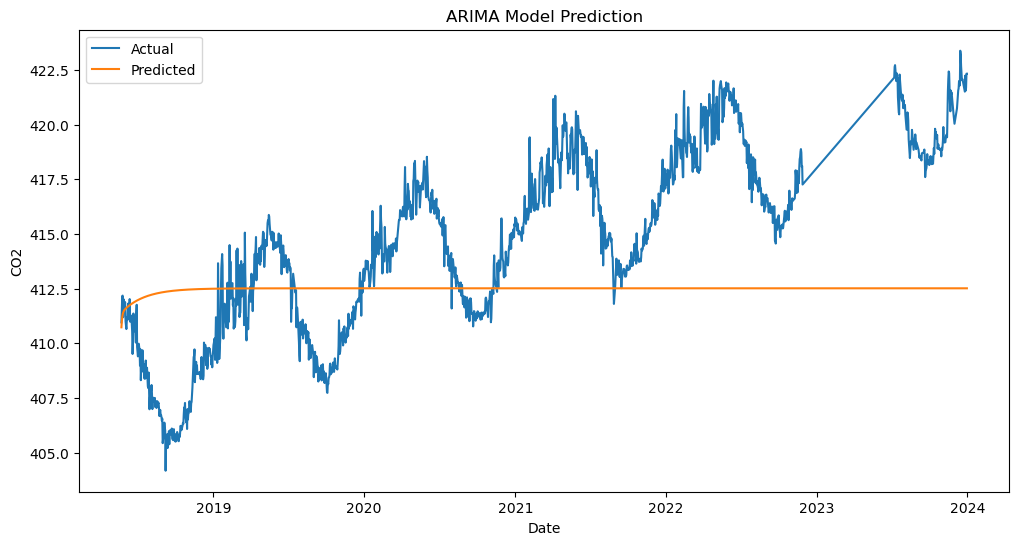

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 8195
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -6010.216
Date:                Sat, 25 May 2024   AIC                          12030.431
Time:                        15:03:03   BIC                          12065.487
Sample:                             0   HQIC                         12042.416
                               - 8195                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5861      0.011    150.485      0.000       1.565       1.607
ar.L2         -0.5933      0.011    -55.245      0.000      -0.614      -0.572
ma.L1         -1.8978      0.007   -290.481      0.0

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 假设数据中有日期特征，命名为 'Year', 'Month', 'Day'
# 我们将直接使用 'CO2' 作为时间序列预测的目标
# 创建日期时间索引
data['Date'] = pd.to_datetime(data[['year', 'month', 'day']])
data.set_index('Date', inplace=True)

# 分离目标值
y = data['CO2_value'].values

# 分割训练集和测试集
train_size = int(len(y) * 0.8)
y_train, y_test = y[:train_size], y[train_size:]

# 使用 auto_arima 自动选择最佳 ARIMA 模型
model = auto_arima(
    y_train,
    start_p=1, start_q=1,
    max_p=5, max_q=5,
    seasonal=False,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

# 训练 ARIMA 模型
model.fit(y_train)

# 在测试集上进行预测
y_pred = model.predict(n_periods=len(y_test))

# 计算测试集上的均方误差 (MSE)
mse_test = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on test set: ", mse_test)

# 计算测试集上的决定系数 (R²)
r2_test = r2_score(y_test, y_pred)
print("R² on test set: ", r2_test)

# 可视化预测结果
plt.figure(figsize=(12, 6))
plt.plot(data.index[train_size:], y_test, label='Actual')
plt.plot(data.index[train_size:], y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('CO2')
plt.title('ARIMA Model Prediction')
plt.legend()
plt.show()

# 打印最佳 ARIMA 模型的参数
print(model.summary())


Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=12239.264, Time=2.54 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=13168.681, Time=1.25 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=12834.357, Time=0.53 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=12635.516, Time=0.94 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=13167.713, Time=0.19 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=12230.767, Time=2.30 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=12573.282, Time=0.75 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=12232.093, Time=3.41 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=12193.393, Time=8.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=12231.211, Time=3.33 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=12234.628, Time=2.71 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=12235.009, Time=5.97 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=12232.777, Time=4.02 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=12241.633, Time=6.78 sec
 ARIMA(2,1,2)(0,0,0

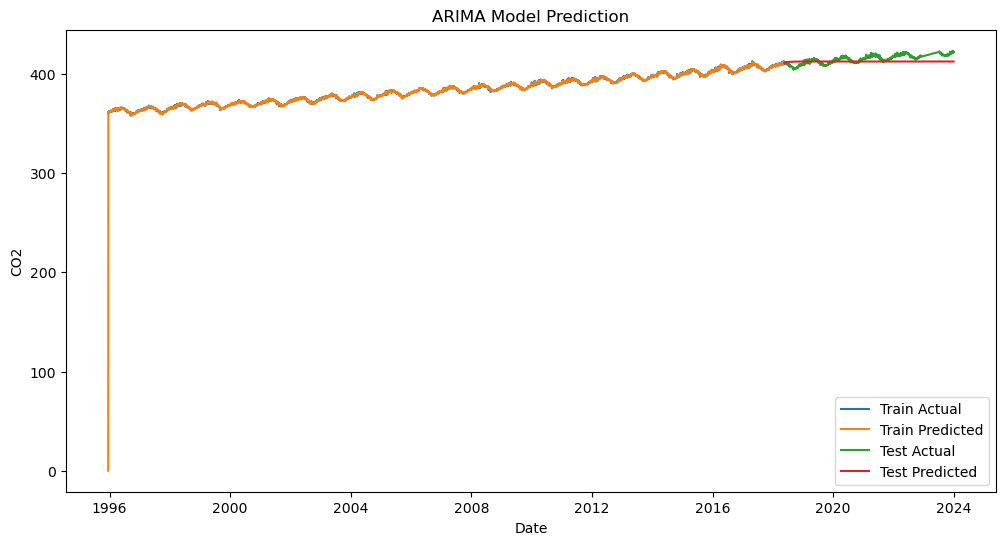

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 8195
Model:               SARIMAX(2, 1, 2)   Log Likelihood               -6010.216
Date:                Sat, 25 May 2024   AIC                          12030.431
Time:                        15:06:09   BIC                          12065.487
Sample:                             0   HQIC                         12042.416
                               - 8195                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.5861      0.011    150.485      0.000       1.565       1.607
ar.L2         -0.5933      0.011    -55.245      0.000      -0.614      -0.572
ma.L1         -1.8978      0.007   -290.481      0.0

In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from pmdarima import auto_arima
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 假设数据中有日期特征，命名为 'Year', 'Month', 'Day'
# 我们将直接使用 'CO2' 作为时间序列预测的目标
# 创建日期时间索引
data['Date'] = pd.to_datetime(data[['year', 'month', 'day']])
data.set_index('Date', inplace=True)

# 分离目标值
y = data['CO2_value'].values

# 分割训练集和测试集
train_size = int(len(y) * 0.8)
y_train, y_test = y[:train_size], y[train_size:]

# 使用 auto_arima 自动选择最佳 ARIMA 模型
model = auto_arima(
    y_train,
    start_p=1, start_q=1,
    max_p=5, max_q=5,
    seasonal=False,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

# 训练 ARIMA 模型
model.fit(y_train)

# 在训练集上进行预测
y_train_pred = model.predict_in_sample()

# 计算训练集上的均方误差 (MSE)
mse_train = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error on training set: ", mse_train)

# 计算训练集上的决定系数 (R²)
r2_train = r2_score(y_train, y_train_pred)
print("R² on training set: ", r2_train)

# 在测试集上进行预测
y_pred = model.predict(n_periods=len(y_test))

# 计算测试集上的均方误差 (MSE)
mse_test = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on test set: ", mse_test)

# 计算测试集上的决定系数 (R²)
r2_test = r2_score(y_test, y_pred)
print("R² on test set: ", r2_test)

# 可视化预测结果
plt.figure(figsize=(12, 6))
plt.plot(data.index[:train_size], y_train, label='Train Actual')
plt.plot(data.index[:train_size], y_train_pred, label='Train Predicted')
plt.plot(data.index[train_size:], y_test, label='Test Actual')
plt.plot(data.index[train_size:], y_pred, label='Test Predicted')
plt.xlabel('Date')
plt.ylabel('CO2')
plt.title('ARIMA Model Prediction')
plt.legend()
plt.show()

# 打印最佳 ARIMA 模型的参数
print(model.summary())


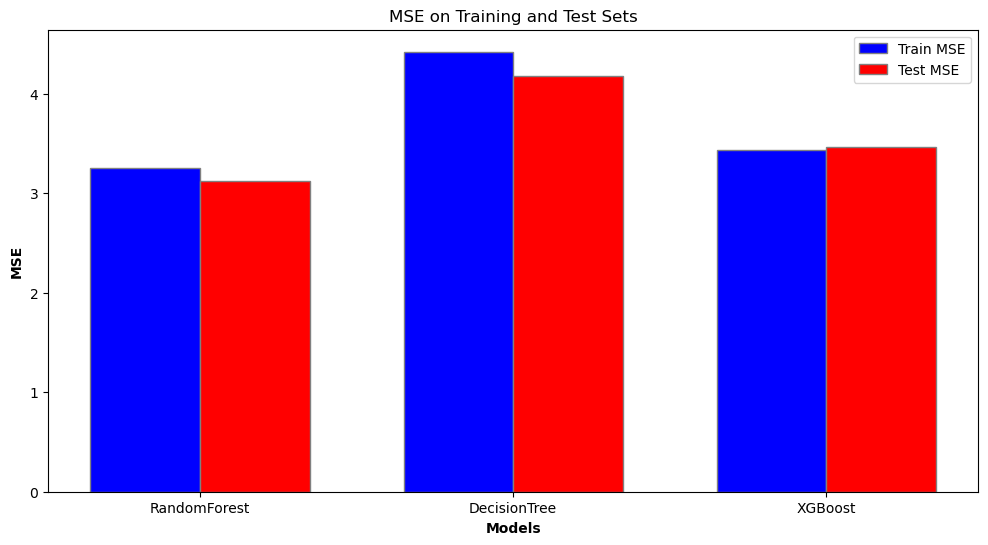

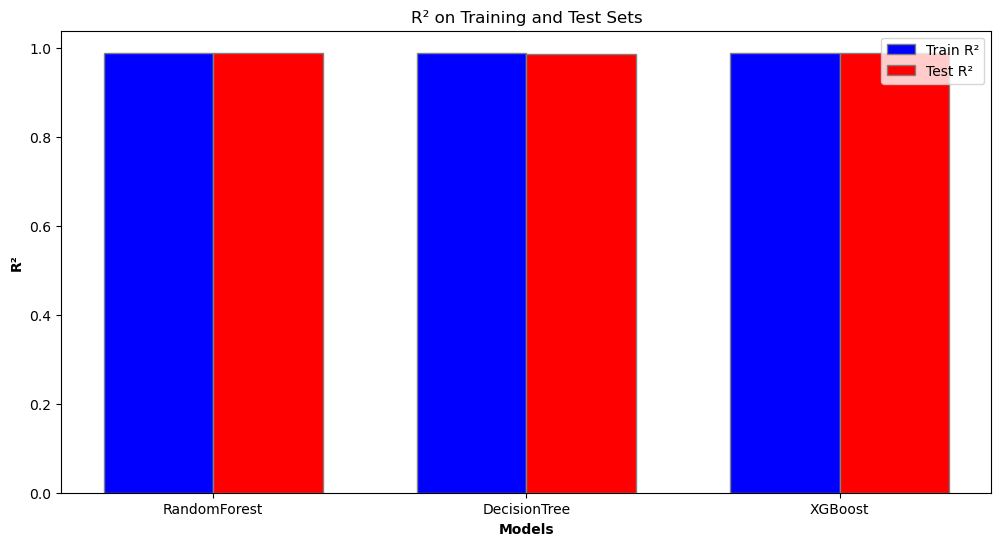

In [23]:
import matplotlib.pyplot as plt
import numpy as np

# 定义MSE和R²值
models = ['RandomForest', 'DecisionTree', 'XGBoost']
train_mse = [3.252924705888344, 4.42243288383495, 3.431462307083305]
test_mse = [3.126227660859496, 4.17763204234624, 3.4609449550707905]
train_r2 = [0.9895746688912341, 0.988537201694546, 0.9890058425604042]
test_r2 = [0.989866219804219, 0.986374966675305, 0.9887124095016625]

# 设置条形图宽度
bar_width = 0.35

# 设置位置
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]

# 绘制MSE图
plt.figure(figsize=(12, 6))
plt.bar(r1, train_mse, color='blue', width=bar_width, edgecolor='grey', label='Train MSE')
plt.bar(r2, test_mse, color='red', width=bar_width, edgecolor='grey', label='Test MSE')

# 添加标签
plt.xlabel('Models', fontweight='bold')
plt.ylabel('MSE', fontweight='bold')
plt.title('MSE on Training and Test Sets')
plt.xticks([r + bar_width/2 for r in range(len(models))], models)
plt.legend()

# # 保存并显示图像
# plt.savefig('/mnt/data/mse_comparison.png')
plt.show()

# 绘制R²图
plt.figure(figsize=(12, 6))
plt.bar(r1, train_r2, color='blue', width=bar_width, edgecolor='grey', label='Train R²')
plt.bar(r2, test_r2, color='red', width=bar_width, edgecolor='grey', label='Test R²')

# 添加标签
plt.xlabel('Models', fontweight='bold')
plt.ylabel('R²', fontweight='bold')
plt.title('R² on Training and Test Sets')
plt.xticks([r + bar_width/2 for r in range(len(models))], models)
plt.legend()

# # 保存并显示图像
# plt.savefig('/mnt/data/r2_comparison.png')
plt.show()


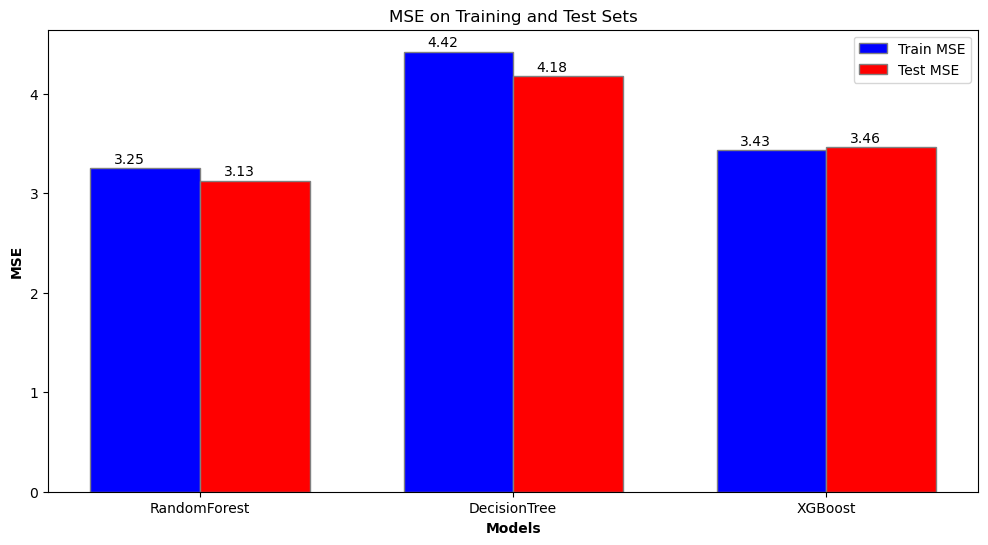

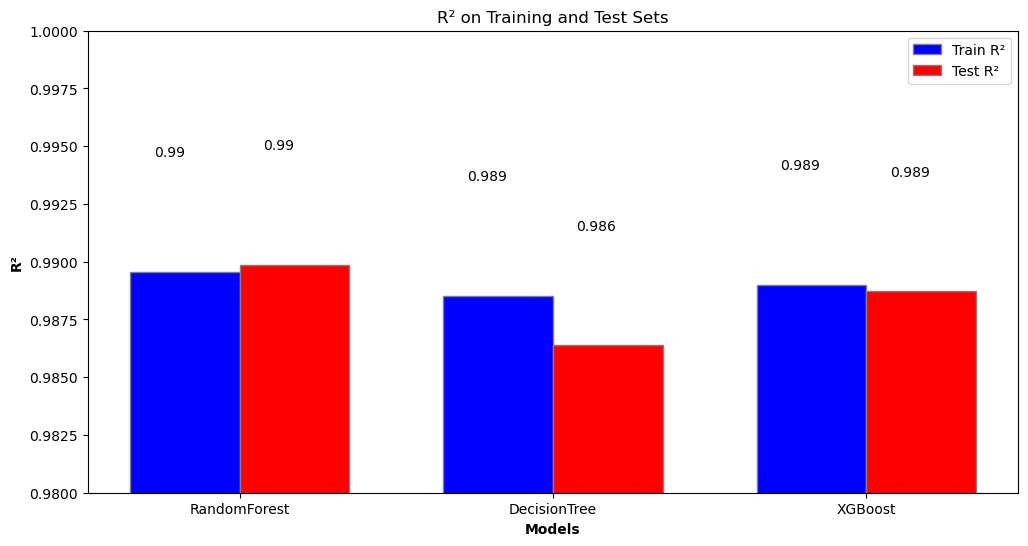

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# 定义MSE和R²值
models = ['RandomForest', 'DecisionTree', 'XGBoost']
train_mse = [3.252924705888344, 4.42243288383495, 3.431462307083305]
test_mse = [3.126227660859496, 4.17763204234624, 3.4609449550707905]
train_r2 = [0.9895746688912341, 0.988537201694546, 0.9890058425604042]
test_r2 = [0.989866219804219, 0.986374966675305, 0.9887124095016625]

# 设置条形图宽度
bar_width = 0.35

# 设置位置
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]

# 绘制MSE图
plt.figure(figsize=(12, 6))
bars1 = plt.bar(r1, train_mse, color='blue', width=bar_width, edgecolor='grey', label='Train MSE')
bars2 = plt.bar(r2, test_mse, color='red', width=bar_width, edgecolor='grey', label='Test MSE')

# 添加数值标签
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, yval + 0.05, round(yval, 2), fontsize=10)

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, yval + 0.05, round(yval, 2), fontsize=10)

# 添加标签
plt.xlabel('Models', fontweight='bold')
plt.ylabel('MSE', fontweight='bold')
plt.title('MSE on Training and Test Sets')
plt.xticks([r + bar_width/2 for r in range(len(models))], models)
plt.legend()

plt.show()

# 绘制R²图
plt.figure(figsize=(12, 6))
bars1 = plt.bar(r1, train_r2, color='blue', width=bar_width, edgecolor='grey', label='Train R²')
bars2 = plt.bar(r2, test_r2, color='red', width=bar_width, edgecolor='grey', label='Test R²')

# 添加数值标签
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, yval + 0.005, round(yval, 3), fontsize=10)

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2 - 0.1, yval + 0.005, round(yval, 3), fontsize=10)

# 添加标签
plt.xlabel('Models', fontweight='bold')
plt.ylabel('R²', fontweight='bold')
plt.title('R² on Training and Test Sets')
plt.ylim(0.98, 1)  # 调整y轴范围
plt.xticks([r + bar_width/2 for r in range(len(models))], models)
plt.legend()

plt.show()


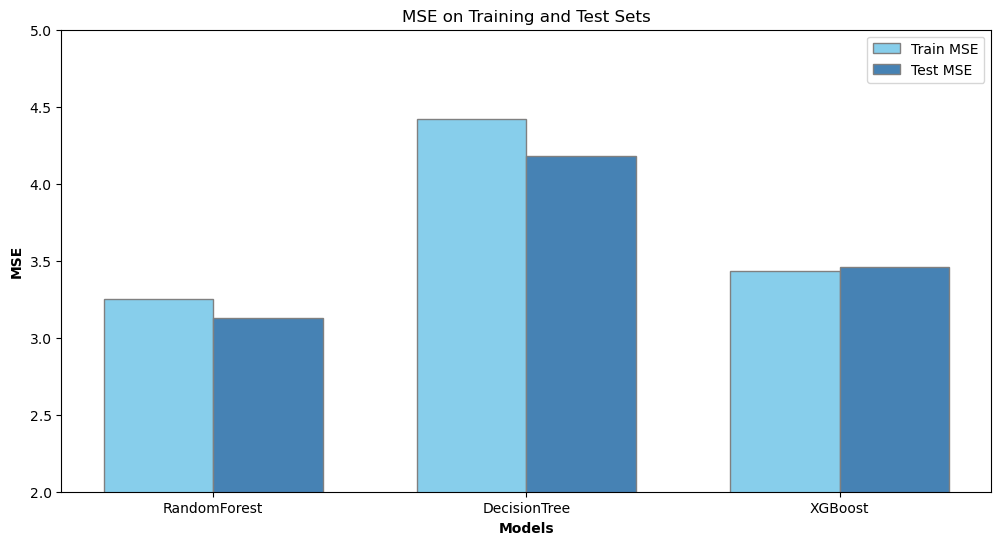

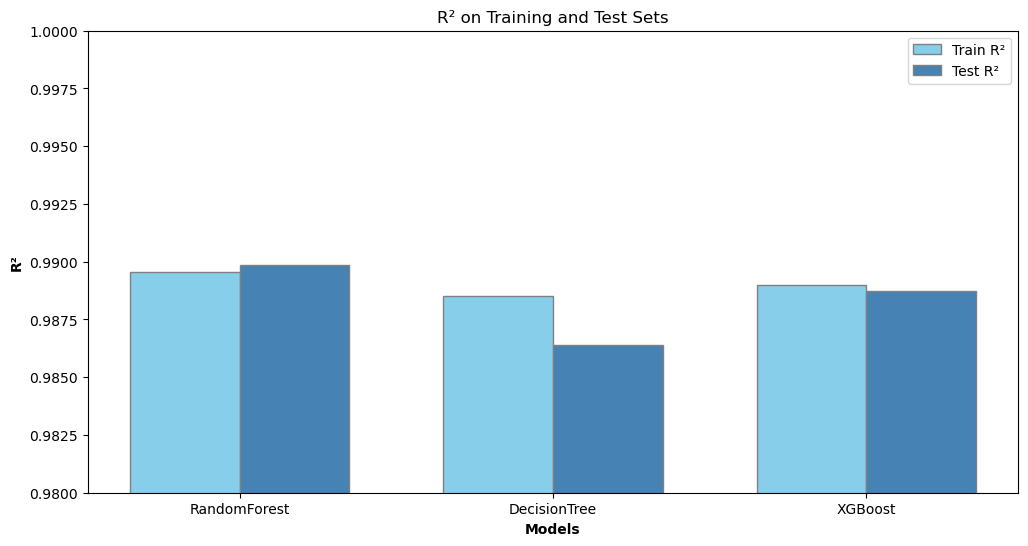

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# 定义MSE和R²值
models = ['RandomForest', 'DecisionTree', 'XGBoost']
train_mse = [3.252924705888344, 4.42243288383495, 3.431462307083305]
test_mse = [3.126227660859496, 4.17763204234624, 3.4609449550707905]
train_r2 = [0.9895746688912341, 0.988537201694546, 0.9890058425604042]
test_r2 = [0.989866219804219, 0.986374966675305, 0.9887124095016625]

# 设置条形图宽度
bar_width = 0.35

# 设置位置
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]

# 绘制MSE图
plt.figure(figsize=(12, 6))
bars1 = plt.bar(r1, train_mse, color='skyblue', width=bar_width, edgecolor='grey', label='Train MSE')
bars2 = plt.bar(r2, test_mse, color='steelblue', width=bar_width, edgecolor='grey', label='Test MSE')

# # 添加数值标签
# for bar in bars1:
#     yval = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width()/2 - 0.1, yval + 0.05, round(yval, 2), fontsize=10)

# for bar in bars2:
#     yval = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width()/2 - 0.1, yval + 0.05, round(yval, 2), fontsize=10)

# 添加标签
plt.xlabel('Models', fontweight='bold')
plt.ylabel('MSE', fontweight='bold')
plt.title('MSE on Training and Test Sets')
plt.ylim(2, 5)  # 调整y轴范围
plt.xticks([r + bar_width/2 for r in range(len(models))], models)
plt.legend()


plt.show()

# 绘制R²图
plt.figure(figsize=(12, 6))
bars1 = plt.bar(r1, train_r2, color='skyblue', width=bar_width, edgecolor='grey', label='Train R²')
bars2 = plt.bar(r2, test_r2, color='steelblue', width=bar_width, edgecolor='grey', label='Test R²')

# 添加标签
plt.xlabel('Models', fontweight='bold')
plt.ylabel('R²', fontweight='bold')
plt.title('R² on Training and Test Sets')
plt.ylim(0.98, 1)  # 调整y轴范围
plt.xticks([r + bar_width/2 for r in range(len(models))], models)
plt.legend()

plt.show()



In [31]:
import pandas as pd

# Define the model names and corresponding MSE values
data = {
    "Model": ["Random Forest (Train Set)", "Random Forest (Test Set)", 
              "Decision Tree (Train Set)", "Decision Tree (Test Set)", 
              "XGBoost (Train Set)", "XGBoost (Test Set)"],
    "MSE": [0.3920, 0.3028, 0.5816, 0.4286, 0.4073, 0.2836],
    "R2": [0.998763, 0.999036, 0.998164, 0.998636, 0.998716, 0.999097]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df


,Model,MSE,R2
0,Random Forest (Train Set),0.3920,0.998763
1,Random Forest (Test Set),0.3028,0.999036
2,Decision Tree (Train Set),0.5816,0.998164
3,Decision Tree (Test Set),0.4286,0.998636
4,XGBoost (Train Set),0.4073,0.998716
5,XGBoost (Test Set),0.2836,0.999097


In [33]:
import pandas as pd

# Define the model names and corresponding MSE and R2 values
data = {
    "Model": ["Random Forest (Train Set)", "Random Forest (Test Set)", 
              "Decision Tree (Train Set)", "Decision Tree (Test Set)", 
              "XGBoost (Train Set)", "XGBoost (Test Set)"],
    "MSE": [0.2611, 0.2271, 0.4331, 0.3270, 0.2392, 0.1843],
    "R2": [0.999129, 0.999277, 0.998553, 0.998959, 0.999201, 0.999413]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df


,Model,MSE,R2
0,Random Forest (Train Set),0.2611,0.999129
1,Random Forest (Test Set),0.2271,0.999277
2,Decision Tree (Train Set),0.4331,0.998553
3,Decision Tree (Test Set),0.3270,0.998959
4,XGBoost (Train Set),0.2392,0.999201
5,XGBoost (Test Set),0.1843,0.999413


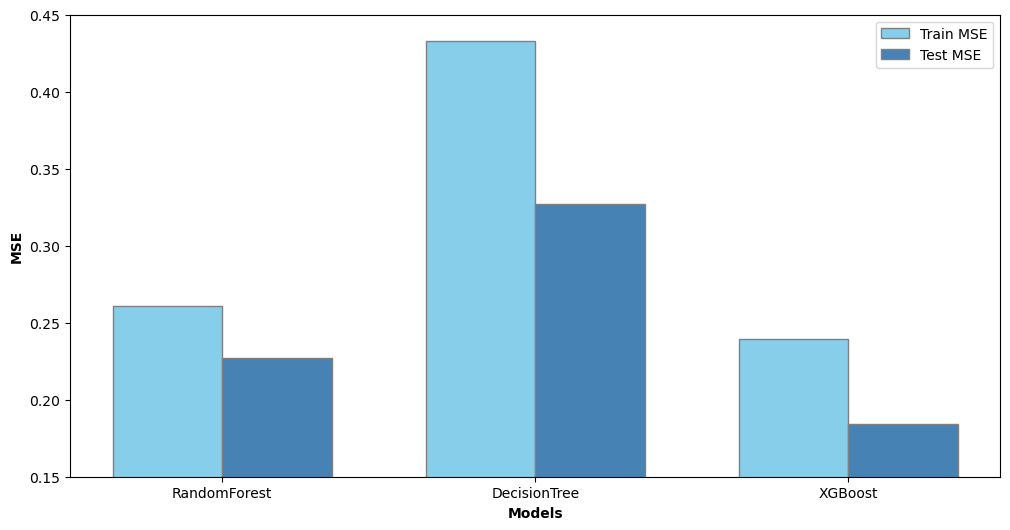

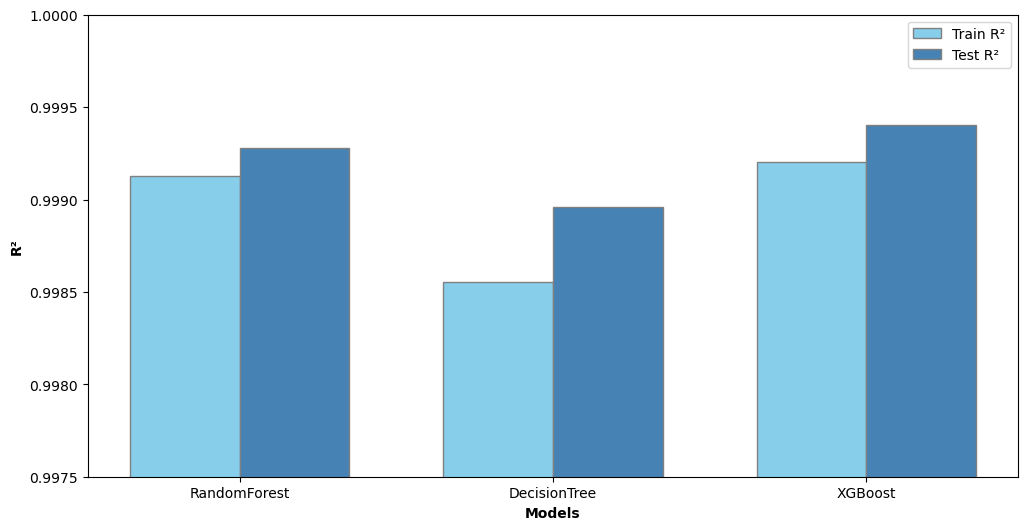

In [42]:
import matplotlib.pyplot as plt
import numpy as np

# 定义MSE和R²值
models = ['RandomForest', 'DecisionTree', 'XGBoost']
train_mse = [0.2611, 0.4331, 0.2392]
test_mse = [0.2271, 0.3270, 0.1843]
train_r2 = [0.999129, 0.998553, 0.999201]
test_r2 = [0.999277, 0.998959, 0.999403]

# 设置条形图宽度
bar_width = 0.35

# 设置位置
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]

# 绘制MSE图
plt.figure(figsize=(12, 6))
bars1 = plt.bar(r1, train_mse, color='skyblue', width=bar_width, edgecolor='grey', label='Train MSE')
bars2 = plt.bar(r2, test_mse, color='steelblue', width=bar_width, edgecolor='grey', label='Test MSE')

# 添加标签
plt.xlabel('Models', fontweight='bold')
plt.ylabel('MSE', fontweight='bold')
plt.ylim(0.15,0.45)  # 调整y轴范围
plt.xticks([r + bar_width/2 for r in range(len(models))], models)
plt.legend()


plt.show()

# 绘制R²图
plt.figure(figsize=(12, 6))
bars1 = plt.bar(r1, train_r2, color='skyblue', width=bar_width, edgecolor='grey', label='Train R²')
bars2 = plt.bar(r2, test_r2, color='steelblue', width=bar_width, edgecolor='grey', label='Test R²')

# 添加标签
plt.xlabel('Models', fontweight='bold')
plt.ylabel('R²', fontweight='bold')
plt.ylim(0.9975, 1)  # 调整y轴范围
plt.xticks([r + bar_width/2 for r in range(len(models))], models)
plt.legend()

plt.show()


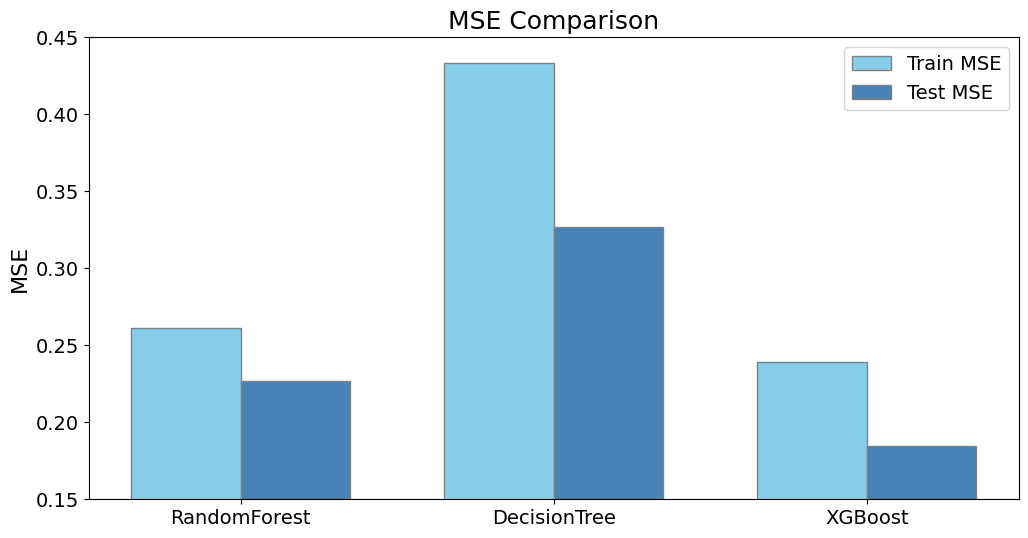

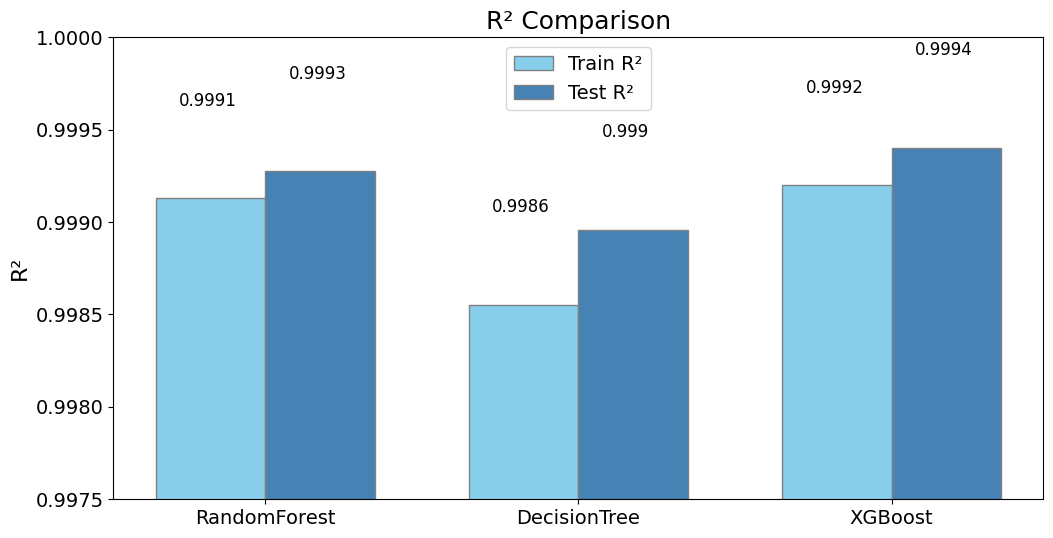

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# 定义MSE和R²值
models = ['RandomForest', 'DecisionTree', 'XGBoost']
train_mse = [0.2611, 0.4331, 0.2392]
test_mse = [0.2271, 0.3270, 0.1843]
train_r2 = [0.999129, 0.998553, 0.999201]
test_r2 = [0.999277, 0.998959, 0.999403]

# 设置条形图宽度
bar_width = 0.35

# 设置位置
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]

# 绘制MSE图
plt.figure(figsize=(12, 6))
bars1 = plt.bar(r1, train_mse, color='skyblue', width=bar_width, edgecolor='grey', label='Train MSE')
bars2 = plt.bar(r2, test_mse, color='steelblue', width=bar_width, edgecolor='grey', label='Test MSE')

# 添加标签
plt.xlabel('', fontweight='bold', fontsize=16)
plt.ylabel('MSE', fontsize=16)
plt.ylim(0.15, 0.45)  # 调整y轴范围
plt.xticks([r + bar_width / 2 for r in range(len(models))], models, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.title('MSE Comparison', fontsize=18)

plt.show()

# 绘制R²图
plt.figure(figsize=(12, 6))
bars1 = plt.bar(r1, train_r2, color='skyblue', width=bar_width, edgecolor='grey', label='Train R²')
bars2 = plt.bar(r2, test_r2, color='steelblue', width=bar_width, edgecolor='grey', label='Test R²')

# 添加数值标签
for bar in bars1:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, yval + 0.0005, round(yval, 4), fontsize=12)

for bar in bars2:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, yval + 0.0005, round(yval, 4), fontsize=12)

# 添加标签
plt.xlabel('', fontweight='bold', fontsize=16)
plt.ylabel('R²', fontsize=16)
plt.ylim(0.9975, 1)  # 调整y轴范围
plt.xticks([r + bar_width / 2 for r in range(len(models))], models, fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=14)
plt.title('R² Comparison', fontsize=18)

plt.show()


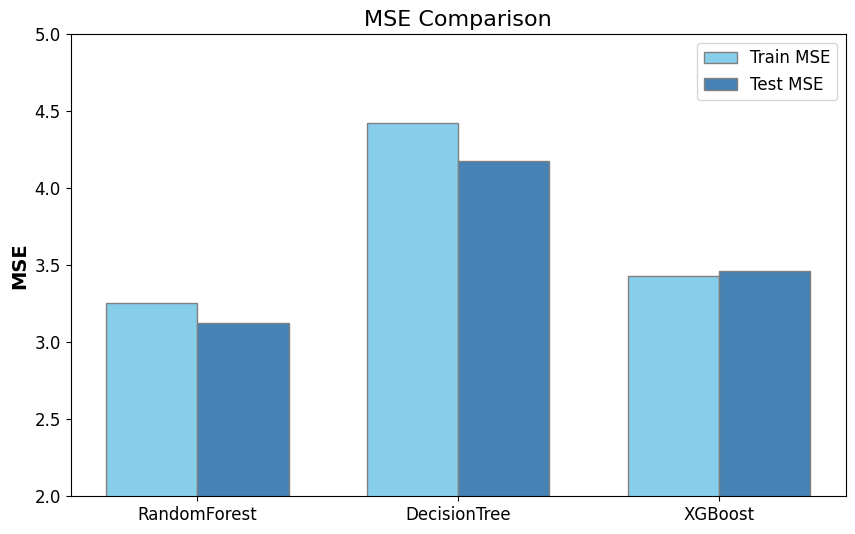

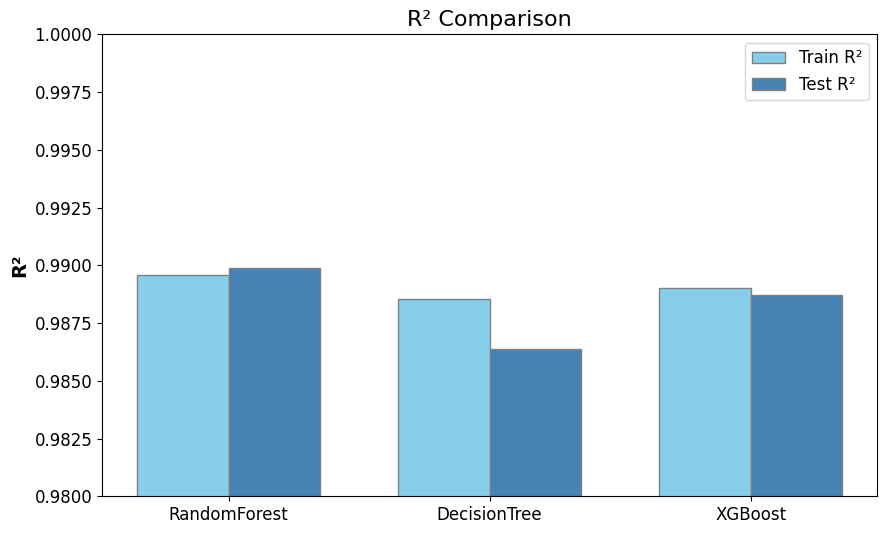

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# 定义MSE和R²值
models = ['RandomForest', 'DecisionTree', 'XGBoost']
train_mse = [3.252924705888344, 4.42243288383495, 3.431462307083305]
test_mse = [3.126227660859496, 4.17763204234624, 3.4609449550707905]
train_r2 = [0.9895746688912341, 0.988537201694546, 0.9890058425604042]
test_r2 = [0.989866219804219, 0.986374966675305, 0.9887124095016625]

# 设置条形图宽度
bar_width = 0.35

# 设置位置
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]

# 绘制MSE图
plt.figure(figsize=(10, 6))
bars1 = plt.bar(r1, train_mse, color='skyblue', width=bar_width, edgecolor='grey', label='Train MSE')
bars2 = plt.bar(r2, test_mse, color='steelblue', width=bar_width, edgecolor='grey', label='Test MSE')

# # 添加数值标签
# for bar in bars1:
#     yval = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, yval + 0.05, round(yval, 2), fontsize=12)

# for bar in bars2:
#     yval = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, yval + 0.05, round(yval, 2), fontsize=12)

# 添加标签
plt.xlabel('', fontweight='bold', fontsize=14)
plt.ylabel('MSE', fontsize=14)
plt.title('MSE Comparison', fontsize=16)
plt.ylim(2, 5)  # 调整y轴范围
plt.xticks([r + bar_width / 2 for r in range(len(models))], models, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.show()

# 绘制R²图
plt.figure(figsize=(10, 6))
bars1 = plt.bar(r1, train_r2, color='skyblue', width=bar_width, edgecolor='grey', label='Train R²')
bars2 = plt.bar(r2, test_r2, color='steelblue', width=bar_width, edgecolor='grey', label='Test R²')

# # 添加数值标签
# for bar in bars1:
#     yval = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, yval + 0.0005, round(yval, 4), fontsize=12)

# for bar in bars2:
#     yval = bar.get_height()
#     plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, yval + 0.0005, round(yval, 4), fontsize=12)

# 添加标签
plt.xlabel('', fontweight='bold', fontsize=14)
plt.ylabel('R²', fontsize=14)
plt.title('R² Comparison', fontsize=16)
plt.ylim(0.98, 1)  # 调整y轴范围
plt.xticks([r + bar_width / 2 for r in range(len(models))], models, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.show()


In [2]:
import pandas as pd

# Define the model names and corresponding MSE and R2 values
data = {
    "Model": ["Random Forest (Train Set)", "Random Forest (Test Set)", 
              "Decision Tree (Train Set)", "Decision Tree (Test Set)", 
              "XGBoost (Train Set)", "XGBoost (Test Set)"],
    "MSE": [3.2529, 3.1622, 4.4224, 4.1776, 3.4314, 3.4609],
    "R2": [0.989574, 0.989686, 0.985833, 0.986374, 0.989005, 0.988712]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df


,Model,MSE,R2
0,Random Forest (Train Set),3.2529,0.989574
1,Random Forest (Test Set),3.1622,0.989686
2,Decision Tree (Train Set),4.4224,0.985833
3,Decision Tree (Test Set),4.1776,0.986374
4,XGBoost (Train Set),3.4314,0.989005
5,XGBoost (Test Set),3.4609,0.988712


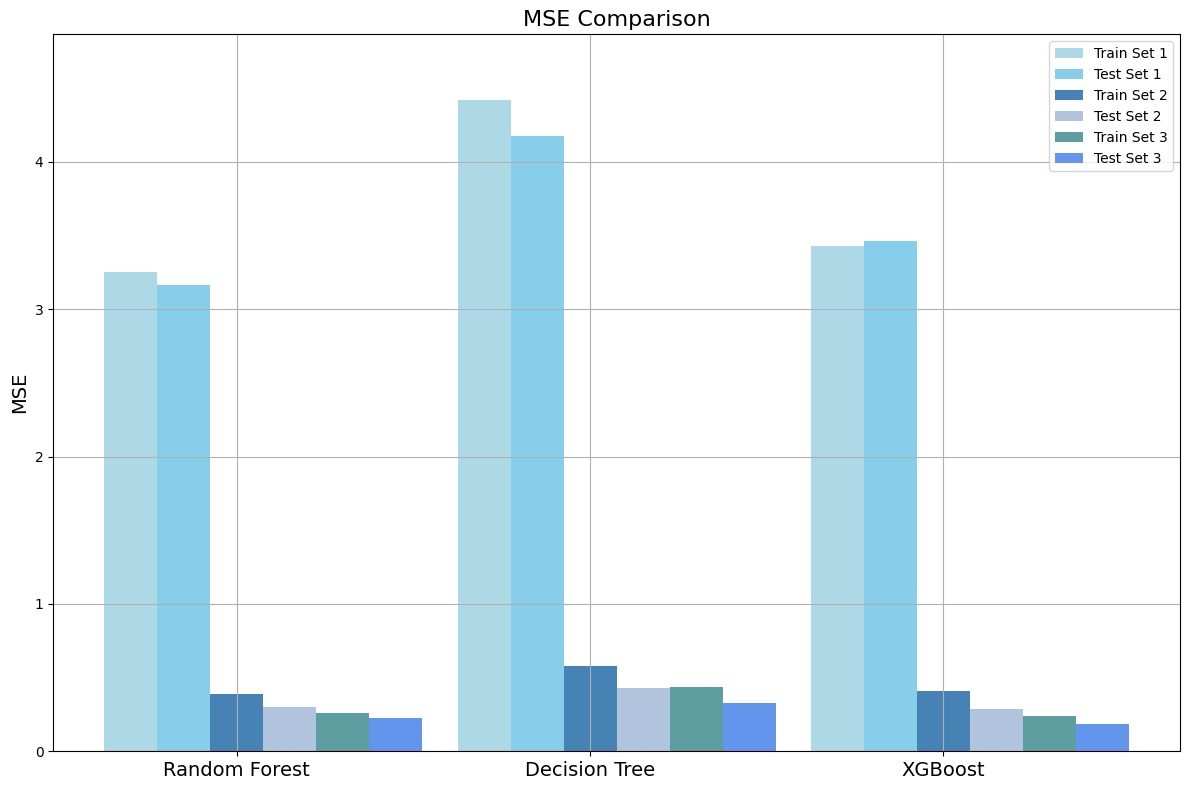

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# 数据
models = ['Random Forest', 'Decision Tree', 'XGBoost']
mse_train_1 = [3.2529, 4.4224, 3.4314]
mse_test_1 = [3.1622, 4.1776, 3.4609]

mse_train_2 = [0.3920, 0.5816, 0.4073]
mse_test_2 = [0.3028, 0.4286, 0.2836]

mse_train_3 = [0.2611, 0.4331, 0.2392]
mse_test_3 = [0.2271, 0.3270, 0.1843]

x = np.arange(len(models))  # 模型的标签位置
width = 0.15  # 条形图的宽度

# 定义颜色
colors = ['#ADD8E6', '#87CEEB', '#4682B4', '#B0C4DE', '#5F9EA0', '#6495ED']

# 绘制 MSE 图
fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - 2*width, mse_train_1, width, label='Train Set 1', color=colors[0])
rects2 = ax.bar(x - width, mse_test_1, width, label='Test Set 1', color=colors[1])
rects3 = ax.bar(x, mse_train_2, width, label='Train Set 2', color=colors[2])
rects4 = ax.bar(x + width, mse_test_2, width, label='Test Set 2', color=colors[3])
rects5 = ax.bar(x + 2*width, mse_train_3, width, label='Train Set 3', color=colors[4])
rects6 = ax.bar(x + 3*width, mse_test_3, width, label='Test Set 3', color=colors[5])

# 添加标题和标签
ax.set_xlabel('', fontsize=14)
ax.set_ylabel('MSE', fontsize=14)
ax.set_title('MSE Comparison', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=14)  # 增大模型名称的字体大小
ax.legend()



# 将所有的 MSE 数据合并到一个列表中
all_mse = mse_train_1 + mse_test_1 + mse_train_2 + mse_test_2 + mse_train_3 + mse_test_3
plt.ylim(0, max(all_mse) * 1.1)
plt.grid(True)
plt.tight_layout()
plt.show()


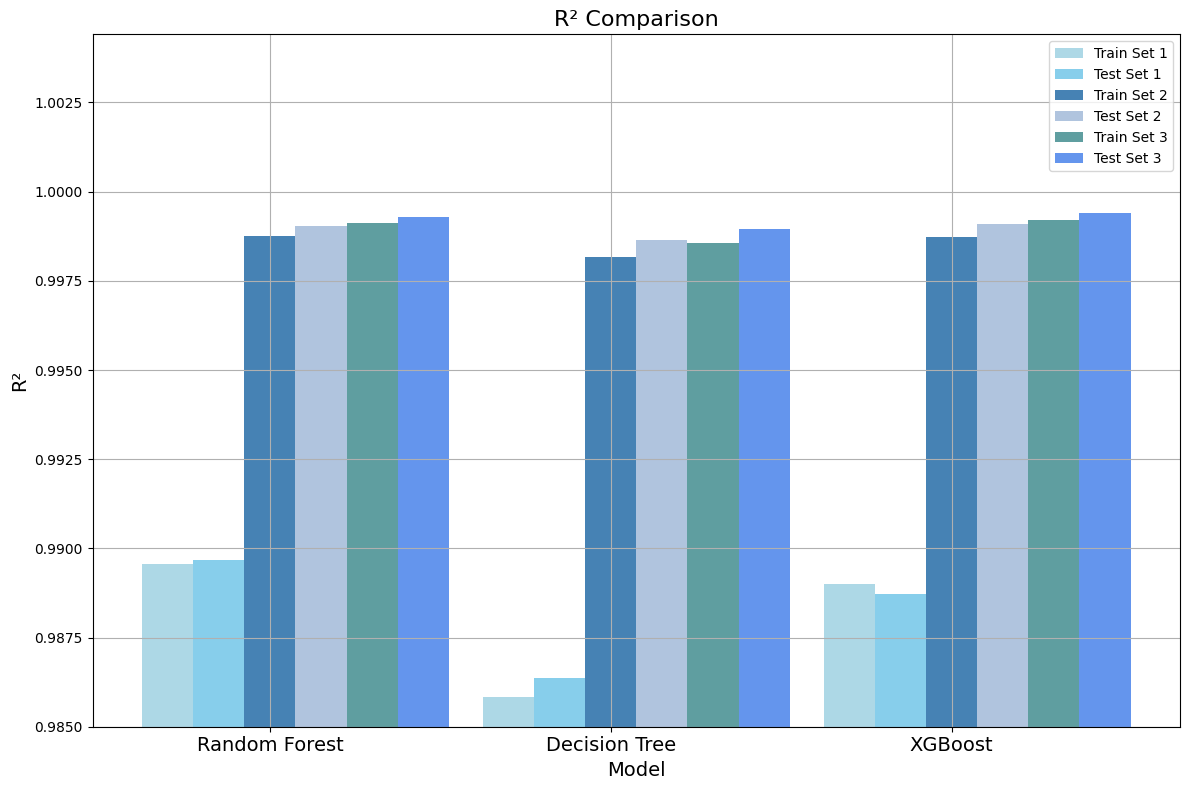

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# 数据
models = ['Random Forest', 'Decision Tree', 'XGBoost']
r2_train_1 = [0.989574, 0.985833, 0.989005]
r2_test_1 = [0.989686, 0.986374, 0.988712]

r2_train_2 = [0.998763, 0.998164, 0.998716]
r2_test_2 = [0.999036, 0.998636, 0.999097]

r2_train_3 = [0.999129, 0.998553, 0.999201]
r2_test_3 = [0.999277, 0.998959, 0.999413]

x = np.arange(len(models))  # 模型的标签位置
width = 0.15  # 条形图的宽度

# 定义颜色
colors = ['#ADD8E6', '#87CEEB', '#4682B4', '#B0C4DE', '#5F9EA0', '#6495ED']

# 绘制 R² 图
fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - 2*width, r2_train_1, width, label='Train Set 1', color=colors[0])
rects2 = ax.bar(x - width, r2_test_1, width, label='Test Set 1', color=colors[1])
rects3 = ax.bar(x, r2_train_2, width, label='Train Set 2', color=colors[2])
rects4 = ax.bar(x + width, r2_test_2, width, label='Test Set 2', color=colors[3])
rects5 = ax.bar(x + 2*width, r2_train_3, width, label='Train Set 3', color=colors[4])
rects6 = ax.bar(x + 3*width, r2_test_3, width, label='Test Set 3', color=colors[5])

# 添加标题和标签
ax.set_xlabel('Model', fontsize=14)
ax.set_ylabel('R²', fontsize=14)
ax.set_title('R² Comparison', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(models, fontsize=14)  # 增大模型名称的字体大小
ax.legend()


# 将所有的 R² 数据合并到一个列表中
all_r2 = r2_train_1 + r2_test_1 + r2_train_2 + r2_test_2 + r2_train_3 + r2_test_3
plt.ylim(0.985, max(all_r2) * 1.005)  # 因为 R² 值接近 1
plt.grid(True)
plt.tight_layout()
plt.show()
